# Comprehensive Analysis of Web-Scraped Data on the Most Played Mobile Games

## Introduction

<p>I scraped some web data from Wikipedia about most played mobile games with respect to player count, capturing details on various mobile games and player count. Then i decided to perform EDA on this information to explore player counts for different games, unveil the correlation between player engagement and release dates, top developers, and find the secrets behind game longevity.</p>

#### Website Link: https://en.wikipedia.org/wiki/List_of_most-played_mobile_games_by_player_count

### The aim of this notebook is to find:

- Trend in Player count over time

- Average player count by Publisher

- Correlation between Player count and Release date

- Seasonal Trends in Player engagement

- Top publishers and player count

- Players who are still playing the game since it was released (game longevity)

In [36]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
URL = 'https://en.wikipedia.org/wiki/List_of_most-played_mobile_games_by_player_count'

page = requests.get(URL)

soup = BeautifulSoup(page.text, "html")

print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of most-played mobile games by player count - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled 

In [6]:
soup.find_all('table')[1]

<table class="wikitable sortable" style="margin:auto; margin:auto;">
<caption>Most-played mobile games by player count (with at least 40 million)
</caption>
<tbody><tr>
<th scope="col">Game
</th>
<th scope="col">As of
</th>
<th scope="col">Player count<sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[a]</a></sup>
</th>
<th scope="col">Release date
</th>
<th scope="col">Publisher(s)
</th>
<th class="unsortable"><abbr title="References">Ref.</abbr>
</th></tr>
<tr>
<td><i><a href="/wiki/Candy_Crush_Saga" title="Candy Crush Saga">Candy Crush Saga</a></i>
</td>
<td><span data-sort-value="000000002023-03-24-0000" style="white-space:nowrap">March 24, 2023</span>
</td>
<td><span data-sort-value="7002500000000000000♠">500</span> million
</td>
<td><span data-sort-value="000000002012-04-12-0000" style="white-space:nowrap">April 12, 2012</span>
</td>
<td><a href="/wiki/King_(company)" title="King (company)">King</a>
</td>
<td><sup class="reference" id="cite_ref-3"><a href="#cite_note-

In [7]:
table = soup.find_all('table')[1]

In [8]:
column_titles = table.find_all('th')
column_titles


[<th scope="col">Game
 </th>,
 <th scope="col">As of
 </th>,
 <th scope="col">Player count<sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[a]</a></sup>
 </th>,
 <th scope="col">Release date
 </th>,
 <th scope="col">Publisher(s)
 </th>,
 <th class="unsortable"><abbr title="References">Ref.</abbr>
 </th>]

In [9]:
my_column_names = [title.text.strip() for title in column_titles]
print(my_column_names)

['Game', 'As of', 'Player count[a]', 'Release date', 'Publisher(s)', 'Ref.']


In [10]:
updated_column_names = [item.replace('[a]', '').replace('(s)', '') for item in my_column_names]
print(updated_column_names)

['Game', 'As of', 'Player count', 'Release date', 'Publisher', 'Ref.']


In [11]:
df = pd.DataFrame(columns=updated_column_names)
df

,Game,As of,Player count,Release date,Publisher,Ref.


In [12]:
data = table.find_all('tr')
data

[<tr>
 <th scope="col">Game
 </th>
 <th scope="col">As of
 </th>
 <th scope="col">Player count<sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[a]</a></sup>
 </th>
 <th scope="col">Release date
 </th>
 <th scope="col">Publisher(s)
 </th>
 <th class="unsortable"><abbr title="References">Ref.</abbr>
 </th></tr>,
 <tr>
 <td><i><a href="/wiki/Candy_Crush_Saga" title="Candy Crush Saga">Candy Crush Saga</a></i>
 </td>
 <td><span data-sort-value="000000002023-03-24-0000" style="white-space:nowrap">March 24, 2023</span>
 </td>
 <td><span data-sort-value="7002500000000000000♠">500</span> million
 </td>
 <td><span data-sort-value="000000002012-04-12-0000" style="white-space:nowrap">April 12, 2012</span>
 </td>
 <td><a href="/wiki/King_(company)" title="King (company)">King</a>
 </td>
 <td><sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[2]</a></sup>
 </td></tr>,
 <tr>
 <td><i><a href="/wiki/Call_of_Duty:_Mobile" title="Call of Duty: Mobile">Call of Duty: Mobile</a></i>

In [13]:
for row in data[1:]:
    row_data = row.find_all('td')
    ind_dataa = [data.text.strip() for data in row_data]
    length = len(df)
    df.loc[length] = ind_dataa

In [14]:
df

,Game,As of,Player count,Release date,Publisher,Ref.
0,Candy Crush Saga,"March 24, 2023",500 million,"April 12, 2012",King,[2]
1,Call of Duty: Mobile,May 2021,500 million downloads[b],"October 1, 2019",Activision,[3]
2,Among Us,November 2020,485 million[c],"June 15, 2018",InnerSloth,[4]
3,Mini World,April 2020,400 million,"December 26, 2015",Miniwan,[5]
4,Sonic Dash,February 2020,350 million,"March 7, 2013",Sega,[6]
...,...,...,...,...,...,...
58,Jikkyō Powerful Pro Yakyū,January 2020,43 million,"December 18, 2014",Konami,[32]
59,Quiz RPG: The World of Mystic Wiz,November 2017,40 million,"March 5, 2013",Colopl,[56]
60,PES Club Manager,July 2020,40 million,"June 5, 2015",Konami,[57]
61,Arknights,April 2020,40 million,"January 16, 2020",Hypergryph / Yostar,[58]


In [15]:
df = df.drop('Ref.', axis=1)

In [16]:
df = df.rename(columns={'As of': 'TimeStamp'})
df

,Game,TimeStamp,Player count,Release date,Publisher
0,Candy Crush Saga,"March 24, 2023",500 million,"April 12, 2012",King
1,Call of Duty: Mobile,May 2021,500 million downloads[b],"October 1, 2019",Activision
2,Among Us,November 2020,485 million[c],"June 15, 2018",InnerSloth
3,Mini World,April 2020,400 million,"December 26, 2015",Miniwan
4,Sonic Dash,February 2020,350 million,"March 7, 2013",Sega
...,...,...,...,...,...
58,Jikkyō Powerful Pro Yakyū,January 2020,43 million,"December 18, 2014",Konami
59,Quiz RPG: The World of Mystic Wiz,November 2017,40 million,"March 5, 2013",Colopl
60,PES Club Manager,July 2020,40 million,"June 5, 2015",Konami
61,Arknights,April 2020,40 million,"January 16, 2020",Hypergryph / Yostar


In [17]:
df[['Release Month', 'Release Year']] = df['Release date'].str.split(', ', expand=True)[[0, 1]]
df1 = df.rename(columns={'Player count': 'Player count (Millions)'})
df1

,Game,TimeStamp,Player count (Millions),Release date,Publisher,Release Month,Release Year
0,Candy Crush Saga,"March 24, 2023",500 million,"April 12, 2012",King,April 12,2012
1,Call of Duty: Mobile,May 2021,500 million downloads[b],"October 1, 2019",Activision,October 1,2019
2,Among Us,November 2020,485 million[c],"June 15, 2018",InnerSloth,June 15,2018
3,Mini World,April 2020,400 million,"December 26, 2015",Miniwan,December 26,2015
4,Sonic Dash,February 2020,350 million,"March 7, 2013",Sega,March 7,2013
...,...,...,...,...,...,...,...
58,Jikkyō Powerful Pro Yakyū,January 2020,43 million,"December 18, 2014",Konami,December 18,2014
59,Quiz RPG: The World of Mystic Wiz,November 2017,40 million,"March 5, 2013",Colopl,March 5,2013
60,PES Club Manager,July 2020,40 million,"June 5, 2015",Konami,June 5,2015
61,Arknights,April 2020,40 million,"January 16, 2020",Hypergryph / Yostar,January 16,2020


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Game           63 non-null     object        
 1   TimeStamp      63 non-null     datetime64[ns]
 2   Player count   63 non-null     int32         
 3   Release date   63 non-null     object        
 4   Publisher      63 non-null     object        
 5   Release Month  63 non-null     int64         
 6   Release Year   63 non-null     int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(3)
memory usage: 3.7+ KB


### Trend in player count over time

In [21]:
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])

In [23]:
df['Player count'] = df['Player count'].str.extract('(\d+)').astype(int)

In [25]:
df['Release Month'] = pd.to_datetime(df['Release Month']).dt.month
df['Release Year'] = pd.to_datetime(df['Release Year']).dt.year


In [28]:
df = df.sort_values(by='TimeStamp')
df

,Game,TimeStamp,Player count,Release date,Publisher,Release Month,Release Year
22,Ice Age Village,2013-01-01,120,"April 5, 2012",Gameloft,4,2012
26,Drag Racing,2013-02-01,100,April 2011,Creative Mobile,4,2011
43,Angry Birds Friends,2013-08-01,60,"February 13, 2012",Rovio Entertainment,2,2012
50,Flappy Bird,2014-02-01,50,"May 24, 2013",dotGears,5,2013
41,Marvel: Avengers Alliance,2015-03-01,70,"March 1, 2012",Disney Interactive,3,2012
...,...,...,...,...,...,...,...
56,New State Mobile,2021-12-01,45,"November 11, 2021",Krafton,11,2021
42,Genshin Impact,2023-02-01,65,"September 28th, 2020",miHoYo,9,2020
0,Candy Crush Saga,2023-03-24,500,"April 12, 2012",King,4,2012
37,The Battle Cats,2023-08-01,84,"September 17, 2014",PONOS,9,2014


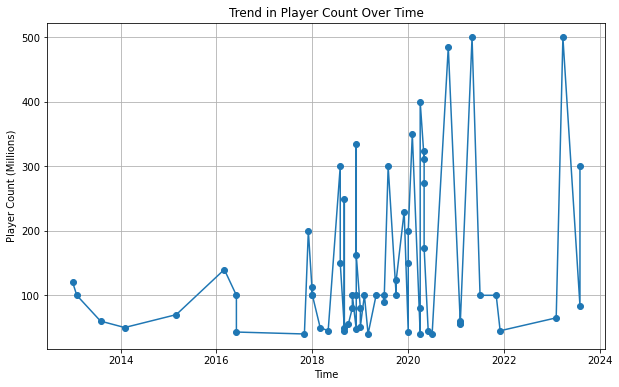

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(df['TimeStamp'], df['Player count'], marker='o', linestyle='-')
plt.title('Trend in Player Count Over Time')
plt.xlabel('Time')
plt.ylabel('Player Count (Millions)')
plt.grid(True)
plt.show()

### Top publishers with avg max players

In [32]:
publisher_performance = df.groupby('Publisher')['Player count'].mean().sort_values(ascending=False)

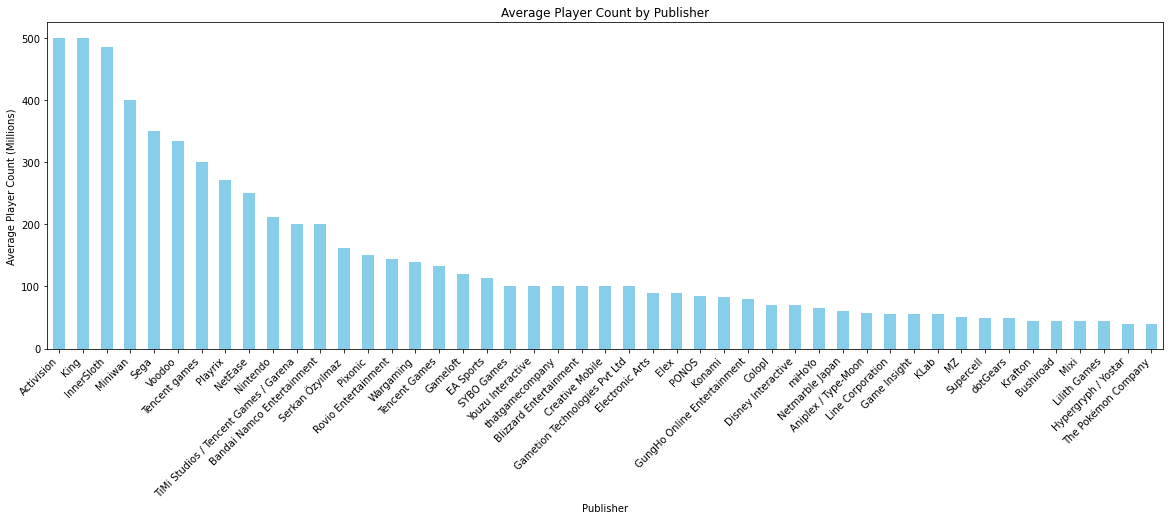

In [34]:
plt.figure(figsize=(20, 6))
publisher_performance.plot(kind='bar', color='skyblue')
plt.title('Average Player Count by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Average Player Count (Millions)')
plt.xticks(rotation=45, ha='right')
plt.show()

### Analyzing the relationship between Release month and player count

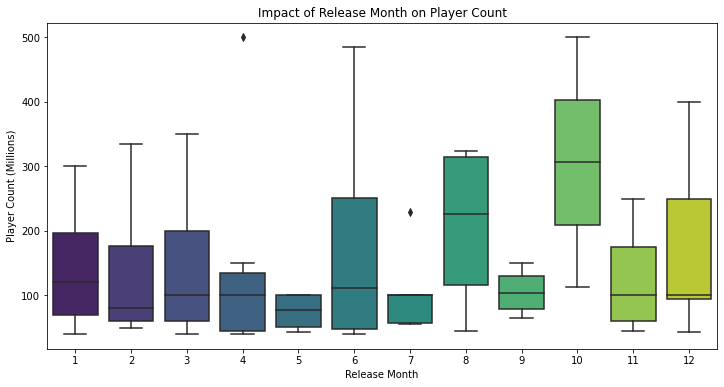

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Release Month'], y=df['Player count'], palette='viridis')
plt.title('Impact of Release Month on Player Count')
plt.xlabel('Release Month')
plt.ylabel('Player Count (Millions)')
plt.show()

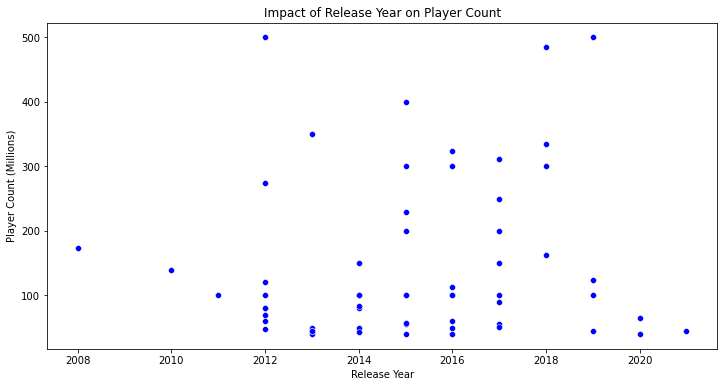

In [38]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Release Year'], y=df['Player count'], color='blue')
plt.title('Impact of Release Year on Player Count')
plt.xlabel('Release Year')
plt.ylabel('Player Count (Millions)')
plt.show()

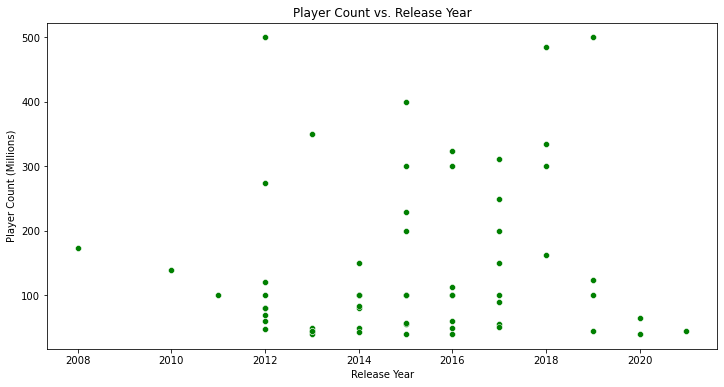

In [46]:
df['Release Year'] = pd.to_numeric(df['Release Year'], errors='coerce')
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Release Year'], y=df['Player count'], color='green')
plt.title('Player Count vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('Player Count (Millions)')
plt.show()
    


### Analyzing seasonal trends for every month for player engagement

In [47]:
df['Month'] = df['TimeStamp'].dt.month
average_player_count_by_month = df.groupby('Month')['Player count'].mean()


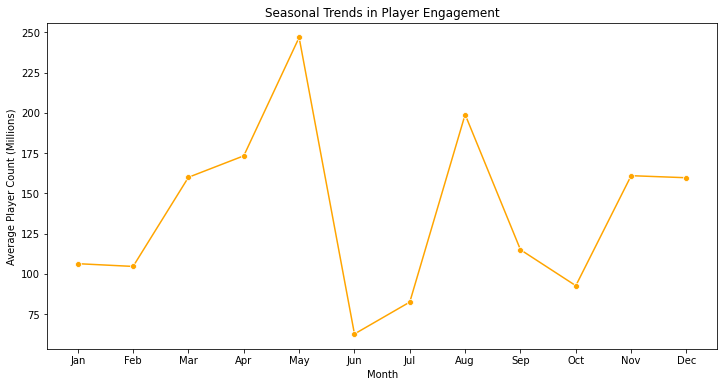

In [48]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_player_count_by_month.index, y=average_player_count_by_month.values, marker='o', color='orange')
plt.title('Seasonal Trends in Player Engagement')
plt.xlabel('Month')
plt.ylabel('Average Player Count (Millions)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Top devs with respect to player count

In [49]:
top_publishers = df['Publisher'].value_counts().nlargest(5).index
df_top_publishers = df[df['Publisher'].isin(top_publishers)]


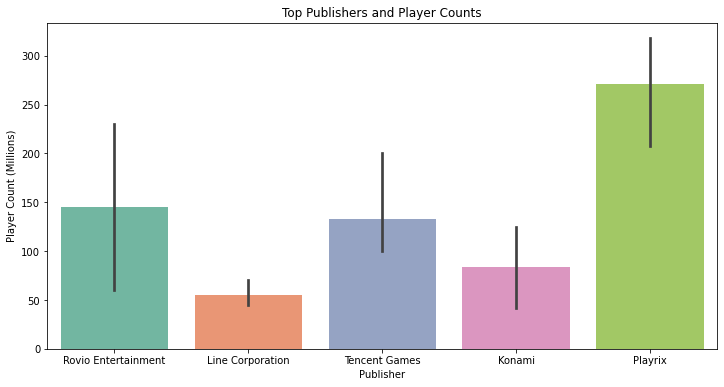

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Publisher', y='Player count', data=df_top_publishers, palette='Set2')
plt.title('Top Publishers and Player Counts')
plt.xlabel('Publisher')
plt.ylabel('Player Count (Millions)')
plt.show()

### Analyzing game longevity

In [54]:
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
df['Release date'] = pd.to_datetime(df['Release date'])

df['Time since Release (days)'] = (df['TimeStamp'] - df['Release date']).dt.days


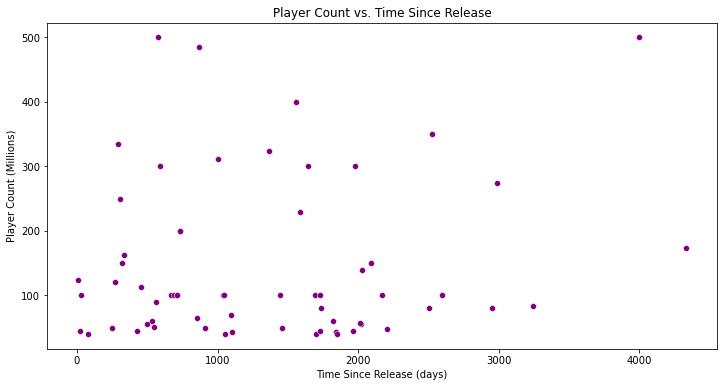

In [55]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Time since Release (days)', y='Player count', data=df, color='purple')
plt.title('Player Count vs. Time Since Release')
plt.xlabel('Time Since Release (days)')
plt.ylabel('Player Count (Millions)')
plt.show()

### My Insights:

#### It is important to note that the insights derived from this project may be inaccurate. The reason for this innacuracy lies in the relatively limited volume of data obtained through web scraping efforts. The smaller dataset size may impact the precision of our findings

- Significant increase in the player count is seen from the year 2020 to 2023

- Activision, King and Innersloth are the top 3 game developers with max average player count

- June, August and October are the prime months where the game which was released had a good amount of player count

- It is difficult to understand the exact month and the year for the correlation of the release date and player count because the data i have scraped is just less

- Playrix, Rovio and Tencent games are the top devs which have the max player count

- It can be observed that the games are played by most of the players upto 2000 days